In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df = pd.read_csv("actions2load.csv")

In [3]:
df.head()

account_id               event_time  \
0  608aa5969cef2edc29cb0c46deaec9da  2019-11-29 12:10:08.154   
1  d07263602248aa70ce1967d6f98f9506  2019-11-29 12:10:19.962   
2  b7d5902d66127909d0f9d766a841ebb5  2019-11-29 12:11:20.707   
3  d07263602248aa70ce1967d6f98f9506  2019-11-29 12:11:41.283   
4  89f7601cb558e1c47b00a7fabb6a466c  2019-11-29 12:11:58.253   

                     event_type  product_id  \
0   DashboardLivebookLinkOpened        1156   
1              ReadingOwnedBook         610   
2              ReadingOwnedBook        1172   
3  ProductTocLivebookLinkOpened        1066   
4              ReadingOwnedBook        1073   

                              additional_data  
0  /book/learn-dbatools-in-a-month-of-lunches  
1                                         60s  
2                                        480s  
3   /book/grokking-machine-learning/chapter-1  
4                                        960s

In [4]:
df.dtypes

account_id         object
event_time         object
event_type         object
product_id          int64
additional_data    object
dtype: object

In [5]:
df.shape

(3242076, 5)

In [6]:
df.nunique()

account_id           89467
event_time         2940583
event_type              35
product_id             740
additional_data     248390
dtype: int64

In [7]:
#find out completeness
df.isnull().sum()

account_id              0
event_time              0
event_type              0
product_id              0
additional_data    516123
dtype: int64

DATA CLEANING




In [8]:
# drop the column with least completeness
df.drop(['additional_data'],axis = 1)

account_id               event_time  \
0        608aa5969cef2edc29cb0c46deaec9da  2019-11-29 12:10:08.154   
1        d07263602248aa70ce1967d6f98f9506  2019-11-29 12:10:19.962   
2        b7d5902d66127909d0f9d766a841ebb5  2019-11-29 12:11:20.707   
3        d07263602248aa70ce1967d6f98f9506  2019-11-29 12:11:41.283   
4        89f7601cb558e1c47b00a7fabb6a466c  2019-11-29 12:11:58.253   
...                                   ...                      ...   
3242071  6bb61e3b7bce0931da574d19d1d82c88  2020-06-04 04:19:56.485   
3242072  6bb61e3b7bce0931da574d19d1d82c88  2020-06-04 04:19:56.486   
3242073  6bb61e3b7bce0931da574d19d1d82c88  2020-06-04 04:19:59.613   
3242074  6bb61e3b7bce0931da574d19d1d82c88  2020-06-04 04:19:59.612   
3242075  3eff5d4b55889abb0a8b08d2136f1b63  2020-06-04 04:20:13.271   

                           event_type  product_id  
0         DashboardLivebookLinkOpened        1156  
1                    ReadingOwnedBook         610  
2                    ReadingOwnedBook        1172  
3        ProductTocLivebookLinkOpened        1066  
4                    ReadingOwnedBook        1073  
...                               ...         ...  
3242071            FirstManningAccess          -1  
3242072           FirstLivebookAccess          -1  
3242073           FirstLivebookAccess          -1  
3242074            FirstManningAccess          -1  
3242075              ReadingOwnedBook         733  

[3242076 rows x 4 columns]

In [9]:
# convert data to clean data
df = df.drop(['additional_data'], axis = 1)

In [10]:
df.isnull().sum()

account_id    0
event_time    0
event_type    0
product_id    0
dtype: int64

In [11]:
df.nunique()

account_id      89467
event_time    2940583
event_type         35
product_id        740
dtype: int64

                most common and least common events



In [12]:
event_frequency = df["event_type"].value_counts()
event_frequency

ReadingOwnedBook                       748260
FirstLivebookAccess                    658226
FirstManningAccess                     657340
EBookDownloaded                        277356
ReadingFreePreview                     138197
HighlightCreated                       121643
FreeContentCheckout                    116183
ReadingOpenChapter                     100004
ProductTocLivebookLinkOpened            88130
LivebookLogin                           62484
DashboardLivebookLinkOpened             48308
WishlistItemAdded                       37609
CrossReferenceTermOpened                34094
SearchMade                              27861
SearchResultOpened                      24228
ProductLookInsideLivebookLinkOpened     22987
BookmarkCreated                         10900
EBookRegistration                        8842
LivebookRegistration                     7702
LivebookAccountConfirmation              7309
ExerciseSolved                           6971
OrderConfirmationLivebookLinkOpene

In [13]:
# the most common event is ReadingOwnedook
# the least common event is CommentCreated
print ('most common event is', event_frequency.idxmax())
print ('least common event is', event_frequency.idxmin())

most common event is ReadingOwnedBook
least common event is CommentCreated


            Account ID with highest and lowest number of events



In [14]:
df["account_id"].value_counts()


6bb61e3b7bce0931da574d19d1d82c88    1371593
86c876e217ae1ca1cd2986c5521a9768      17357
0c2a23a1ce63aa22296072df5cd065f7       5697
954c5420b7247345858b62c84d606bb7       5690
4de78691553567a9b9e20fde6667773b       4890
                                     ...   
8a831a7856dc0da98c6be48f705dcce8          1
155487ef76edc522f21a6fb177eaed78          1
bb7c0b0484f1908b7d85520a0429a826          1
b615e5a363163bc167b877cf34037568          1
3519f4939d54c1911afa74226a78c3f9          1
Name: account_id, Length: 89467, dtype: int64

In [15]:
# account_id with the highest event is 6bb61e3b7bce0931da574d19d1d82c88
# account_id with the lowest number of event is 3519f4939d54c1911afa74226a78c3f9

print('account_id with the highest number of event is', df['account_id'].value_counts().idxmax())
print('account_id with the lowest number of event is', df['account_id'].value_counts().idxmin()) 

account_id with the highest number of event is 6bb61e3b7bce0931da574d19d1d82c88
account_id with the lowest number of event is 96d5a9368c0d2c2febc62ea760a6a96c


        Event Occurence based on time of the day
        
        

In [16]:
# convert event_time to date time format
df['event_time']= pd.to_datetime(df['event_time'])

In [17]:
df.dtypes

account_id            object
event_time    datetime64[ns]
event_type            object
product_id             int64
dtype: object

In [18]:
# create a new column event_year
df['event_year']= df['event_time'].dt.year

In [19]:
# create a column event_month
df['event_month']= df['event_time'].dt.month

In [20]:
#create a new column day_of_ the_month
df['day_of_the_week'] = df['event_time'].dt.day

In [21]:
# create a new column for event_day
df['event_day']= df['event_time'].dt.day_name()

In [22]:
# create a new column for event_hour
df['event_hour']= df['event_time'].dt.hour

In [23]:
# create new column showing event time of the day
df['event_time_of_the_day'] = df['event_time'].dt.time

In [24]:
df.head()

account_id              event_time  \
0  608aa5969cef2edc29cb0c46deaec9da 2019-11-29 12:10:08.154   
1  d07263602248aa70ce1967d6f98f9506 2019-11-29 12:10:19.962   
2  b7d5902d66127909d0f9d766a841ebb5 2019-11-29 12:11:20.707   
3  d07263602248aa70ce1967d6f98f9506 2019-11-29 12:11:41.283   
4  89f7601cb558e1c47b00a7fabb6a466c 2019-11-29 12:11:58.253   

                     event_type  product_id  event_year  event_month  \
0   DashboardLivebookLinkOpened        1156        2019           11   
1              ReadingOwnedBook         610        2019           11   
2              ReadingOwnedBook        1172        2019           11   
3  ProductTocLivebookLinkOpened        1066        2019           11   
4              ReadingOwnedBook        1073        2019           11   

   day_of_the_week event_day  event_hour event_time_of_the_day  
0               29    Friday          12       12:10:08.154000  
1               29    Friday          12       12:10:19.962000  
2               29    Friday          12       12:11:20.707000  
3               29    Friday          12       12:11:41.283000  
4               29    Friday          12       12:11:58.253000

In [25]:
#defining time periods function
def TimePeriod(hour):
    if 0 < hour < 6:
        period = "Early hours"
    elif 5 < hour <12 :
        period = "Morning"
    elif 11  < hour < 17:
        period= "Afternoon"
    elif 16 < hour <20:
        period = "Evening"
    else:
        period = "Night"
    return period

In [26]:
# period of occurrance in a day
df['period_of_day'] = df['event_hour'].apply(TimePeriod)
df.head()

account_id              event_time  \
0  608aa5969cef2edc29cb0c46deaec9da 2019-11-29 12:10:08.154   
1  d07263602248aa70ce1967d6f98f9506 2019-11-29 12:10:19.962   
2  b7d5902d66127909d0f9d766a841ebb5 2019-11-29 12:11:20.707   
3  d07263602248aa70ce1967d6f98f9506 2019-11-29 12:11:41.283   
4  89f7601cb558e1c47b00a7fabb6a466c 2019-11-29 12:11:58.253   

                     event_type  product_id  event_year  event_month  \
0   DashboardLivebookLinkOpened        1156        2019           11   
1              ReadingOwnedBook         610        2019           11   
2              ReadingOwnedBook        1172        2019           11   
3  ProductTocLivebookLinkOpened        1066        2019           11   
4              ReadingOwnedBook        1073        2019           11   

   day_of_the_week event_day  event_hour event_time_of_the_day period_of_day  
0               29    Friday          12       12:10:08.154000     Afternoon  
1               29    Friday          12       12:10:19.962000     Afternoon  
2               29    Friday          12       12:11:20.707000     Afternoon  
3               29    Friday          12       12:11:41.283000     Afternoon  
4               29    Friday          12       12:11:58.253000     Afternoon

In [27]:
#Analysis number of subscription in the year.
# there were more events subscriptions in 2020 than in 2019
number_of_events = df['event_year'].value_counts().to_frame().reset_index()
number_of_events.columns=['event_year','event_count']
number_of_events

event_year  event_count
0        2020      2938654
1        2019       303422

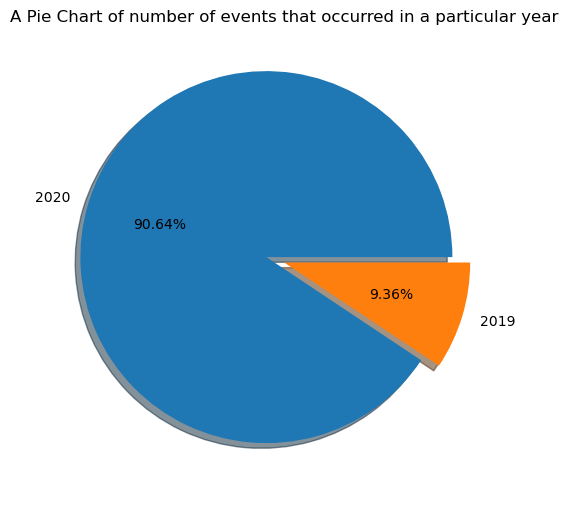

In [28]:
#Analysis number of subscription by year
plt.figure(figsize=(6,8))
plt.pie(number_of_events['event_count'],labels=number_of_events['event_year'], explode= [0.1,0.0], autopct='%1.2f%%', shadow= True)
plt.title("A Pie Chart of number of events that occurred in a particular year")
plt.show()
#The pie chart shows there was a significant increase in subscriptions 
#in year 2020 when compared to year 2019

In [29]:
df.nunique()

account_id                 89467
event_time               2940583
event_type                    35
product_id                   740
event_year                     2
event_month                    8
day_of_the_week               31
event_day                      7
event_hour                    24
event_time_of_the_day    2890131
period_of_day                  5
dtype: int64

In [30]:
df['event_month'].value_counts()

4     946620
5     811680
3     569745
12    296113
1     267102
2     264952
6      78555
11      7309
Name: event_month, dtype: int64

Text(0.5, 1.0, 'monthly subscription')

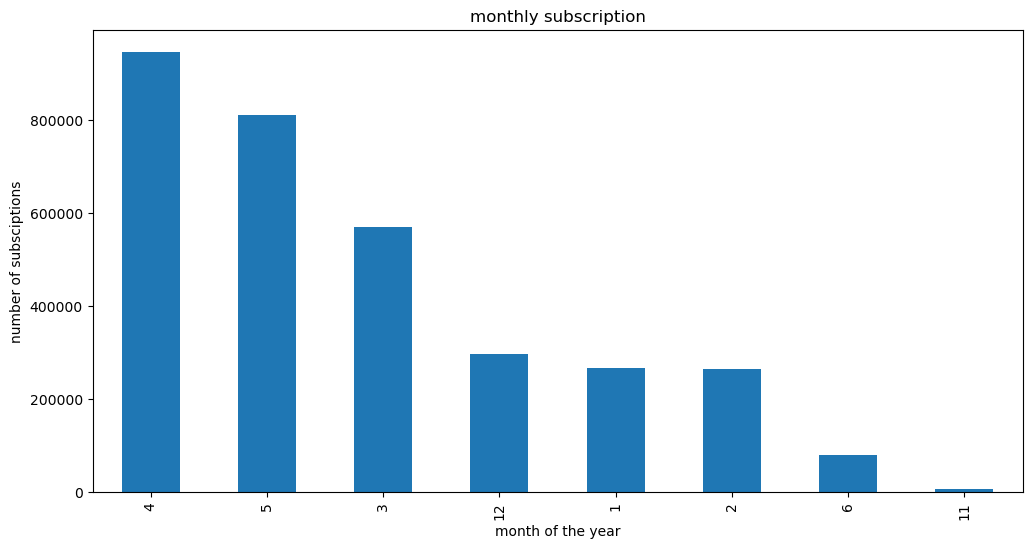

In [31]:
#Analysis the number of events by month visually
df['event_month'].value_counts().plot.bar(figsize = (12,6))
plt.ylabel('number of subsciptions')
plt.xlabel('month of the year')
plt.title ('monthly subscription')
#the Month of April has more subscription and November have the least number of subscriptions

In [32]:
#comparing total monthly subscriptions by year.
pd.crosstab(df['event_year'],df['event_month'], margins = True)

event_month       1       2       3       4       5      6    11      12  \
event_year                                                                 
2019              0       0       0       0       0      0  7309  296113   
2020         267102  264952  569745  946620  811680  78555     0       0   
All          267102  264952  569745  946620  811680  78555  7309  296113   

event_month      All  
event_year            
2019          303422  
2020         2938654  
All          3242076

In [33]:
p_of_day = df['period_of_day'].value_counts().to_frame().reset_index()
p_of_day.columns = ['period of day','event numbers']
p_of_day

period of day  event numbers
0     Afternoon         839437
1       Morning         805110
2         Night         618664
3   Early hours         524316
4       Evening         454549

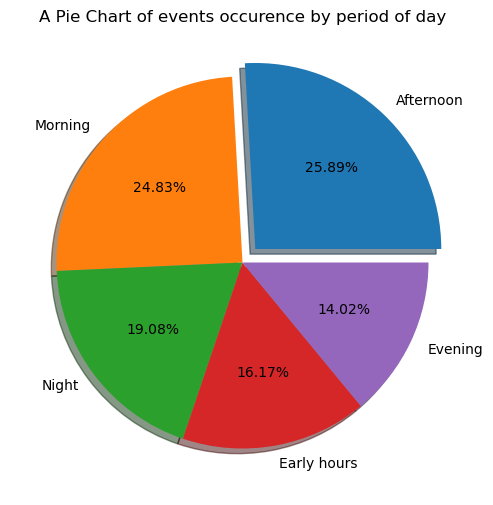

In [34]:
#plot a pie chart
plt.figure(figsize=(6,8))
plt.pie(p_of_day['event numbers'],labels=p_of_day['period of day'], explode= [0.1,0.0,0.0,0.0,0.0], autopct='%1.2f%%', shadow= True)
plt.title("A Pie Chart of events occurence by period of day")
plt.show()
#morning period has the highest number of events and evening has th least number of events

In [35]:
df['day_of_the_week'].value_counts()

19    141694
20    124116
24    117138
26    114750
2     114658
25    114161
27    113989
1     112314
13    110648
17    108855
29    108734
28    108330
23    107954
3     107324
12    107007
16    105995
6     104777
21    104717
18    104382
30    101733
11    100929
22     99770
14     98488
7      96840
15     95307
10     93687
9      91927
8      88381
5      88317
4      86782
31     68372
Name: day_of_the_week, dtype: int64

In [36]:
day_of_the_week = df['event_day'].value_counts().to_frame()
'day_of_the_week'

'day_of_the_week'

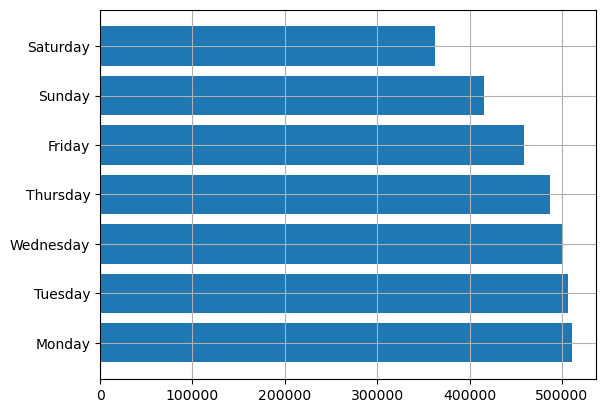

In [37]:
#visualizing event  by days of the week
x = day_of_the_week.index
y = day_of_the_week['event_day']
plt.barh(x,y)
plt.grid()
#more

In [38]:
#comparing the occurence of event at a particular time of the day 
#in the different days of the week
#using period of day and event_day
day_period_data = pd.crosstab(df['period_of_day'],df['event_day'])

In [39]:
day_period_data

event_day      Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
period_of_day                                                                
Afternoon      118394  130949     91508  116625    121056   132542     128363
Early hours     73261   83076     59983   61334     83335    82121      81206
Evening         63716   71197     51559   60079     67434    70878      69686
Morning        120120  128252     85646   92710    123427   129177     125778
Night           83229   97959     73505   84692     92112    91999      95168

In [40]:
monthly_frequency = df['event_month'].value_counts()/ len('event_month')
monthly_frequency

4     86056.363636
5     73789.090909
3     51795.000000
12    26919.363636
1     24282.000000
2     24086.545455
6      7141.363636
11      664.454545
Name: event_month, dtype: float64

In [41]:
df["account_id"].value_counts()

6bb61e3b7bce0931da574d19d1d82c88    1371593
86c876e217ae1ca1cd2986c5521a9768      17357
0c2a23a1ce63aa22296072df5cd065f7       5697
954c5420b7247345858b62c84d606bb7       5690
4de78691553567a9b9e20fde6667773b       4890
                                     ...   
8a831a7856dc0da98c6be48f705dcce8          1
155487ef76edc522f21a6fb177eaed78          1
bb7c0b0484f1908b7d85520a0429a826          1
b615e5a363163bc167b877cf34037568          1
3519f4939d54c1911afa74226a78c3f9          1
Name: account_id, Length: 89467, dtype: int64

In [42]:
#Analysing account_id 6bb61e3b7bce0931da574d19d1d82c88for insight based on event occurance

df2=df[df['account_id']=='6bb61e3b7bce0931da574d19d1d82c88']

In [43]:
df2

account_id              event_time  \
11274    6bb61e3b7bce0931da574d19d1d82c88 2019-12-01 17:15:43.536   
11311    6bb61e3b7bce0931da574d19d1d82c88 2019-12-01 17:22:44.636   
11464    6bb61e3b7bce0931da574d19d1d82c88 2019-12-01 17:42:06.366   
11465    6bb61e3b7bce0931da574d19d1d82c88 2019-12-01 17:42:09.420   
11477    6bb61e3b7bce0931da574d19d1d82c88 2019-12-01 17:44:08.387   
...                                   ...                     ...   
3242068  6bb61e3b7bce0931da574d19d1d82c88 2020-06-04 04:19:27.445   
3242071  6bb61e3b7bce0931da574d19d1d82c88 2020-06-04 04:19:56.485   
3242072  6bb61e3b7bce0931da574d19d1d82c88 2020-06-04 04:19:56.486   
3242073  6bb61e3b7bce0931da574d19d1d82c88 2020-06-04 04:19:59.613   
3242074  6bb61e3b7bce0931da574d19d1d82c88 2020-06-04 04:19:59.612   

                  event_type  product_id  event_year  event_month  \
11274    ShareableLinkOpened         975        2019           12   
11311    ShareableLinkOpened        1094        2019           12   
11464    ShareableLinkOpened         975        2019           12   
11465    ShareableLinkOpened        1094        2019           12   
11477    ShareableLinkOpened        1094        2019           12   
...                      ...         ...         ...          ...   
3242068   FirstManningAccess          -1        2020            6   
3242071   FirstManningAccess          -1        2020            6   
3242072  FirstLivebookAccess          -1        2020            6   
3242073  FirstLivebookAccess          -1        2020            6   
3242074   FirstManningAccess          -1        2020            6   

         day_of_the_week event_day  event_hour event_time_of_the_day  \
11274                  1    Sunday          17       17:15:43.536000   
11311                  1    Sunday          17       17:22:44.636000   
11464                  1    Sunday          17       17:42:06.366000   
11465                  1    Sunday          17       17:42:09.420000   
11477                  1    Sunday          17       17:44:08.387000   
...                  ...       ...         ...                   ...   
3242068                4  Thursday           4       04:19:27.445000   
3242071                4  Thursday           4       04:19:56.485000   
3242072                4  Thursday           4       04:19:56.486000   
3242073                4  Thursday           4       04:19:59.613000   
3242074                4  Thursday           4       04:19:59.612000   

        period_of_day  
11274         Evening  
11311         Evening  
11464         Evening  
11465         Evening  
11477         Evening  
...               ...  
3242068   Early hours  
3242071   Early hours  
3242072   Early hours  
3242073   Early hours  
3242074   Early hours  

[1371593 rows x 11 columns]

In [44]:
df2['event_type'].value_counts()

FirstLivebookAccess    658226
FirstManningAccess     657340
FreeContentCheckout     55772
ShareableLinkOpened       231
SearchResultOpened         24
Name: event_type, dtype: int64

In [45]:
#comparing the occurence of event at a particular time of the day 
#using period of day and event_type
#carry out by account_id 6bb61e3b7bce0931da574d19d1d82c88

account_data_day_period = pd.crosstab(df2['period_of_day'],df2['event_type'])
account_data_day_period

event_type     FirstLivebookAccess  FirstManningAccess  FreeContentCheckout  \
period_of_day                                                                 
Afternoon                   180237              180008                15425   
Early hours                  96495               96217                 9696   
Evening                      90428               90215                 8390   
Morning                     180122              180186                11114   
Night                       110944              110714                11147   

event_type     SearchResultOpened  ShareableLinkOpened  
period_of_day                                           
Afternoon                       4                   68  
Early hours                     5                   19  
Evening                         3                   42  
Morning                         7                   50  
Night                           5                   52

In [46]:
#To analyse the total numbers of events carried out in a particular period of day

account_data_period_of_day= df2['period_of_day'].value_counts().to_frame().reset_index()
account_data_period_of_day.columns = ['period of day','event numbers']
account_data_period_of_day


period of day  event numbers
0     Afternoon         375742
1       Morning         371479
2         Night         232862
3   Early hours         202432
4       Evening         189078

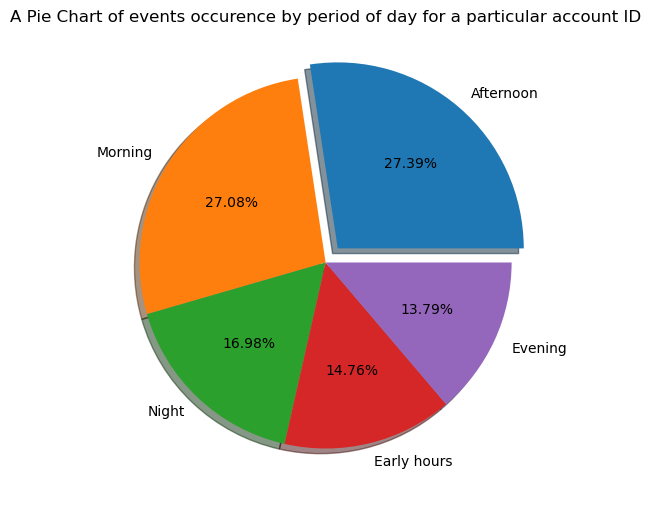

In [47]:
#plot a pie chart
plt.figure(figsize=(6,8))
plt.pie(account_data_period_of_day['event numbers'],labels=account_data_period_of_day['period of day'], explode= [0.1,0.0,0.0,0.0,0.0], autopct='%1.2f%%', shadow= True)
plt.title("A Pie Chart of events occurence by period of day for a particular account ID")
plt.show()
#Afternoon period has the highest number of events and evening has the least number of events

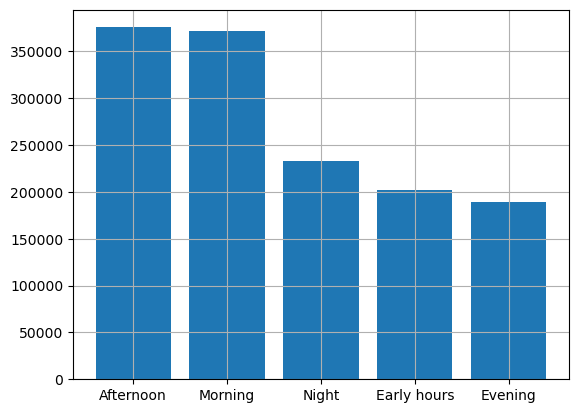

In [48]:
#visualizing the sum total of events by period of day for account_id 6bb61e3b7bce0931da574d19d1d82c88

x = account_data_period_of_day['period of day']
y = account_data_period_of_day['event numbers']
plt.bar(x,y)
plt.grid()

In [49]:
number_of_events = df['event_type'].value_counts().to_frame().reset_index()
number_of_events.columns = ['event_type','counts']
number_of_events

event_type  counts
0                      ReadingOwnedBook  748260
1                   FirstLivebookAccess  658226
2                    FirstManningAccess  657340
3                       EBookDownloaded  277356
4                    ReadingFreePreview  138197
5                      HighlightCreated  121643
6                   FreeContentCheckout  116183
7                    ReadingOpenChapter  100004
8          ProductTocLivebookLinkOpened   88130
9                         LivebookLogin   62484
10          DashboardLivebookLinkOpened   48308
11                    WishlistItemAdded   37609
12             CrossReferenceTermOpened   34094
13                           SearchMade   27861
14                   SearchResultOpened   24228
15  ProductLookInsideLivebookLinkOpened   22987
16                      BookmarkCreated   10900
17                    EBookRegistration    8842
18                 LivebookRegistration    7702
19          LivebookAccountConfirmation    7309
20                       ExerciseSolved    6971
21  OrderConfirmationLivebookLinkOpened    6739
22                   AddProductOffering    6511
23                          NoteCreated    5181
24                          UpvoteGiven    4815
25              GoToManningShoppingCart    4608
26                 ShareableLinkCreated    2746
27                  ShareableLinkOpened    2387
28                RemoveProductOffering    2163
29                    AddOrUpdateCoupon    1277
30               ProductLiveaudioUpsell     838
31             ProductSeeFreeLinkOpened     163
32              SherlockHolmesClueFound      10
33      UnknownOriginLivebookLinkOpened       3
34                       CommentCreated       1

Text(0.5, 1.0, 'Boxplot')

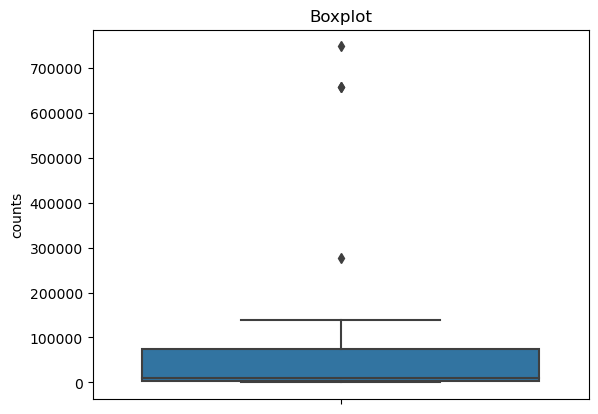

In [50]:
#Boxplot to examine outlier
import seaborn as sns
sns.boxplot(y= number_of_events['counts'])
plt.title('Boxplot')

In [51]:
def find_boundaries(df, variable, distance):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [52]:
#Calculate and then display the IQR proximity rule boundaries for the population variable:
#Values below or above the upper and lower boundary by 1.5
upper_boundary, lower_boundary = find_boundaries(number_of_events, 'counts', 1.5)
upper_boundary, lower_boundary

(182752.0, -103768.0)

In [53]:
#find the outliers 
#Create a boolean vector to flag observations outside the boundaries we determined:
outliers = np.where(number_of_events['counts'] > upper_boundary, True,
            np.where(number_of_events['counts'] < lower_boundary, True, False))

In [54]:
outliers

array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [55]:
#Create a new dataframe with the outlier values and then display the top five rows:
outliers_df = number_of_events.loc[outliers, 'counts']
outliers_df.head(20)

0    748260
1    658226
2    657340
3    277356
Name: counts, dtype: int64

In [56]:
#remove outliers from the dataset:
number_of_events_trimmed = number_of_events.loc[~(outliers)]

In [57]:
number_of_events_trimmed

event_type  counts
4                    ReadingFreePreview  138197
5                      HighlightCreated  121643
6                   FreeContentCheckout  116183
7                    ReadingOpenChapter  100004
8          ProductTocLivebookLinkOpened   88130
9                         LivebookLogin   62484
10          DashboardLivebookLinkOpened   48308
11                    WishlistItemAdded   37609
12             CrossReferenceTermOpened   34094
13                           SearchMade   27861
14                   SearchResultOpened   24228
15  ProductLookInsideLivebookLinkOpened   22987
16                      BookmarkCreated   10900
17                    EBookRegistration    8842
18                 LivebookRegistration    7702
19          LivebookAccountConfirmation    7309
20                       ExerciseSolved    6971
21  OrderConfirmationLivebookLinkOpened    6739
22                   AddProductOffering    6511
23                          NoteCreated    5181
24                          UpvoteGiven    4815
25              GoToManningShoppingCart    4608
26                 ShareableLinkCreated    2746
27                  ShareableLinkOpened    2387
28                RemoveProductOffering    2163
29                    AddOrUpdateCoupon    1277
30               ProductLiveaudioUpsell     838
31             ProductSeeFreeLinkOpened     163
32              SherlockHolmesClueFound      10
33      UnknownOriginLivebookLinkOpened       3
34                       CommentCreated       1